In [2]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import re
import researchpy as rp
import scipy.stats as stats

In [3]:
df = pd.read_csv('user_details_20210806.csv')

In [4]:
df

,user_id,created_on,screen_name_count,screen_names,is_bot,bot_rt_network,is_q,q_status_count,status_count,rt_count,...,friend_count_b,friend_count_h,avg_toxicity,avg_severe_toxicity,avg_insult,avg_obscene,avg_threat,avg_identity_hate,fact_scored_count,avg_fact_score
0,1201029281482235904,2019-12-01,1,HARRIETSUSAN4,False,NaN,False,NaN,18,16,...,6.0,337.0,0.050687,0.000232,0.002113,0.001177,0.000461,0.003759,0,NaN
1,337091850,2011-07-17,1,SUSANMMRAZ,False,NaN,False,NaN,105,80,...,120.0,1622.0,0.115957,0.001983,0.058983,0.049420,0.000667,0.004879,2,3.892857
2,2370334990,2014-02-28,1,EDDIETHUNDER44,False,NaN,False,NaN,35,15,...,95.0,1666.0,0.129561,0.008591,0.058599,0.039499,0.009718,0.004566,0,NaN
3,858913836,2012-10-03,1,RICHARDCRESSE,True,NaN,True,1.0,700,681,...,78.0,425.0,0.063513,0.000393,0.015775,0.012956,0.000578,0.001460,8,1.625000
4,622750531,2012-06-30,1,YERBOUTISHEIK,False,NaN,False,NaN,184,154,...,93.0,1520.0,0.120060,0.005381,0.050481,0.064212,0.002673,0.003119,1,2.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3600540,1539138800,2013-06-22,1,RYDERPMR,False,NaN,False,NaN,12,12,...,2.0,87.0,0.038260,0.000205,0.001591,0.001431,0.000299,0.003800,0,NaN
3600541,54455239,2009-07-07,1,JANNNATE,False,NaN,False,NaN,12,12,...,10.0,436.0,0.081213,0.000230,0.013944,0.002908,0.000245,0.002467,0,NaN
3600542,865572195086606336,2017-05-19,1,ONECABLE25,False,NaN,False,NaN,12,12,...,6.0,145.0,0.023700,0.000158,0.000568,0.000679,0.000669,0.000523,0,NaN
3600543,1107399188676034561,2019-03-17,2,MORTALDOOMBAT | MORTALFNDOOMBAT,False,NaN,False,NaN,14,12,...,0.0,8.0,0.087837,0.001984,0.022834,0.056990,0.001484,0.003296,0,NaN


In [5]:
Date = df['created_on']

In [6]:
Year = Date.str.split('-',expand = True)[0]
Year = Year.to_frame()
Year.columns = ['Year']
count = Year.groupby('Year').size()
count = count.to_frame().reset_index(drop = False)
count.columns = ['Year','Count']

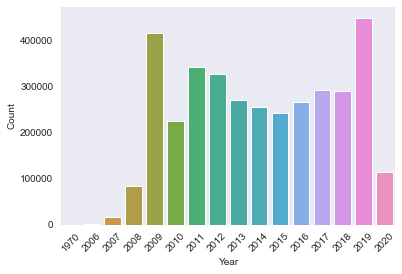

In [35]:
bar, ax = plt.subplots()
sns.set_style("dark")
sns.despine()
ax = sns.barplot(x='Year',y='Count', data = count)
plt.xticks(rotation = 45)
plt.show()

Year = Date.str.split('-',expand = True)[0]
Year = Year.astype("datetime64")

Year.groupby(Year.dt.year).count().plot(kind="bar")

According to the plot, most of the accounts are created at 2019

In [8]:
df2 = df[df['is_bot'] == True]

In [9]:
num = df2.groupby(df2['opinion_community']).size().to_frame().reset_index()
num.columns = ['attitude', 'count']
num['attitude'] = ['anti-trump','pro-trump']
num

,attitude,count
0,anti-trump,10145
1,pro-trump,14005


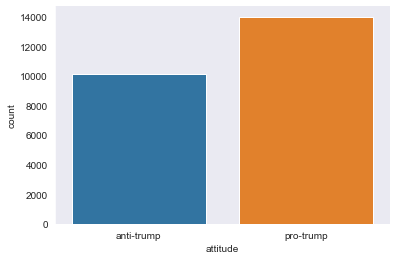

In [10]:
bar, ax = plt.subplots()
sns.set_style("dark")
sns.despine()
ax = sns.barplot(x='attitude',y='count', data = num)
plt.show()

According to the plot, most of the bots are anti-trump

In [13]:
pro = df2[df2['opinion_community'] == 1]
anti = df2[df2['opinion_community'] == 0]

In [14]:
bots = pd.DataFrame(data = {'pro':[len(pro)], 'anti':[len(anti)]})
bots

,pro,anti
0,14005,10145


According to the df, pro-trump bots are more than anti-trump bots

In [15]:
pro_Date = pro['created_on']
pro_Year = pro_Date.str.split('-',expand = True)[0].to_frame()
pro_Year.columns = ['Year']
pro_count = pro_Year.groupby(pro_Year['Year']).size().to_frame().reset_index()

In [16]:
pro_count.columns = ['Year','pro_count']

In [17]:
pro_count

,Year,pro_count
0,2007,13
1,2008,196
2,2009,1252
3,2010,552
4,2011,897
5,2012,1187
6,2013,826
7,2014,752
8,2015,1027
9,2016,1767


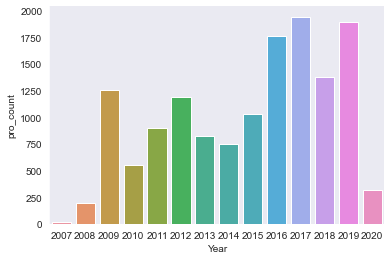

In [18]:
bar, ax = plt.subplots()
sns.set_style("dark")
sns.despine()
ax = sns.barplot(x='Year',y='pro_count', data = pro_count)
plt.show()

In [19]:
anti_Date = anti['created_on']
anti_Year = anti_Date.str.split('-',expand = True)[0].to_frame()
anti_Year.columns = ['Year']
anti_count = anti_Year.groupby(anti_Year['Year']).size().to_frame().reset_index()
anti_count.columns = ['Year','anti_count']

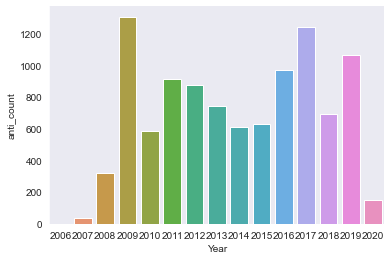

In [20]:
bar, ax = plt.subplots()
sns.set_style("dark")
sns.despine()
ax = sns.barplot(x='Year',y='anti_count', data = anti_count)
plt.show()

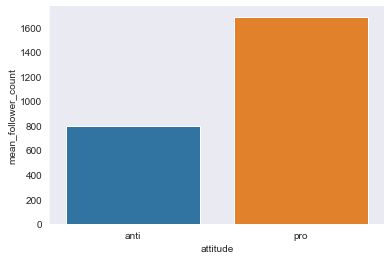

In [25]:
mean_follower = df2.groupby(['opinion_community'])['follower_count'].mean().to_frame().reset_index()
mean_follower.columns = ['attitude','mean_follower_count']
mean_follower['attitude'] = ['anti','pro']
bar, ax = plt.subplots()
sns.set_style("dark")
sns.despine()
ax = sns.barplot(x='attitude',y='mean_follower_count', data = mean_follower)
plt.show()

According to the result, we can see that pro-trump bot has more follower than anti-trump bot on average

In [26]:
pro_follower = pro[pro['follower_count'] > 0]
pro_bot_fol_avg = statistics.mean(pro_follower['follower_count_b']/pro_follower['follower_count'])
anti_follower = anti[anti['follower_count'] > 0]
anti_bot_fol_avg = statistics.mean(anti_follower['follower_count_b']/anti_follower['follower_count'])
bot_fol_avg = pd.DataFrame({'pro':[pro_bot_fol_avg],'anti':[anti_bot_fol_avg]})
bot_fol_avg

,pro,anti
0,0.068034,0.046251


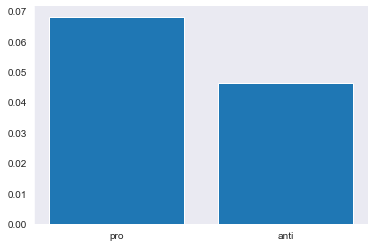

In [27]:
bar, ax = plt.subplots()
sns.set_style("dark")
sns.despine()
my_list=list(bot_fol_avg.columns)
percentage = bot_fol_avg.sum()
ax.bar(my_list, percentage)
plt.show()

According to the graph, the average of percentage of number of bot follower of pro-trump bot is higher than anti-trump bot. But the difference is not very big and the percentage is very small which means most of followers are real human.

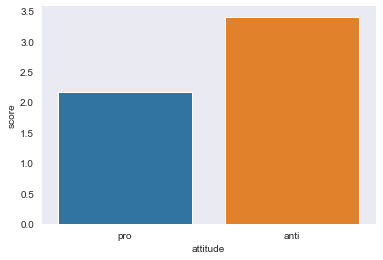

In [28]:
pro_links = statistics.mean(pro[pro['avg_fact_score'] > 0]['avg_fact_score'])
anti_links = statistics.mean(anti[anti['avg_fact_score'] > 0]['avg_fact_score'])
links_df = pd.DataFrame({'attitude':['pro','anti'],'score':[pro_links, anti_links]})
bar, ax = plt.subplots()
sns.set_style("dark")
sns.despine()
ax = sns.barplot(x='attitude',y='score', data = links_df)
plt.show()

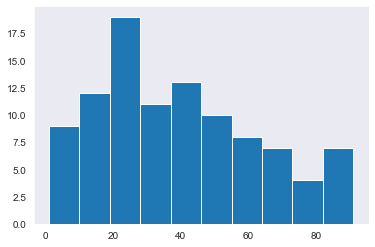

In [29]:
import matplotlib.pyplot as plt
 
x = [1,1,2,3,3,5,7,8,9,10,
     10,11,11,13,13,15,16,17,18,18,
     18,19,20,21,21,23,24,24,25,25,
     25,25,26,26,26,27,27,27,27,27,
     29,30,30,31,33,34,34,34,35,36,
     36,37,37,38,38,39,40,41,41,42,
     43,44,45,45,46,47,48,48,49,50,
     51,52,53,54,55,55,56,57,58,60,
     61,63,64,65,66,68,70,71,72,74,
     75,77,81,83,84,87,89,90,90,91
     ]

plt.hist(x, bins=10)
plt.show()

In [ ]:
from scipy.stats import chi2_contingency 
 
info = [[100, 200, 300], [50, 60, 70]] 
print(info)
stat, p, dof= chi2_contingency(info) 

In [4]:
pro = df[df['opinion_community'] == 1]
anti = df[df['opinion_community'] == 0]

In [7]:
crosstab = pd.crosstab(pro['avg_toxicity'][1:10000], pro['avg_severe_toxicity'][1:10000])
stats.chi2_contingency(crosstab)

(95900409.00000028,
 0.2725652156920494,
 95892030,
 array([[0.00010001, 0.00010001, 0.00010001, ..., 0.00010001, 0.00010001,
         0.00010001],
        [0.00010001, 0.00010001, 0.00010001, ..., 0.00010001, 0.00010001,
         0.00010001],
        [0.00010001, 0.00010001, 0.00010001, ..., 0.00010001, 0.00010001,
         0.00010001],
        ...,
        [0.00010001, 0.00010001, 0.00010001, ..., 0.00010001, 0.00010001,
         0.00010001],
        [0.00010001, 0.00010001, 0.00010001, ..., 0.00010001, 0.00010001,
         0.00010001],
        [0.00010001, 0.00010001, 0.00010001, ..., 0.00010001, 0.00010001,
         0.00010001]]))